#**Produisez une étude de marché avec R ou Python**

Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Son activité principale est l’élevage et la vente de poulets sous le label “Poulet Agriculture Biologique”.

Son activité actuelle est franco-française mais Patrick, le PDG de l’entreprise souhaite évaluer la possibilité de se développer à l'international. Pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Ton objectif sera de proposer une analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché.

Tu seras en autonomie sur ce projet, notamment sur le choix des données à analyser et du langage (R ou Python).
1.	Pars des données de la FAO (Food and Agriculture Organization) en pièce jointe pour commencer ton analyse puis :
utilise l’analyse PESTEL pour trouver des idées de nouvelles données à ajouter (nous voulons au minimum 8 variables) ;
récupère et utilise toutes les données en open data que tu souhaites sur le site de la FAO, de la banque mondiale ou encore sur données mondiales.
2.	Prépare et nettoie les données :
Si tu utilises plusieurs sources de données, regroupe-les dans un même fichier.
L’idéal serait d’avoir au minimum 100 pays dans notre analyse (qui couvrent au moins 60% de la population mondiale).
3.	Passe ensuite à l’exploration des données (en Python ou en R).
Je ne vais pas t’apprendre ton travail, je crois que tu as suffisamment fait cela !

Pour la partie analytique, réalise une ACP avec réductions des dimensions et un clustering (dans un notebook séparé de l’exploration des données) :
Analyse le cercle des corrélations et la projection des individus.
Regroupe les pays en utilisant les données de ton ACP ou les données brutes.
Commence par la classification ascendante hiérarchique puis un k-means.


Juste pour te rappeler que tu présenteras tes résultats dans un mois devant le COMEX. Nous attendons des préconisations de pays où nous étendre, et puis tu feras un point sur ta méthodologie de collecte, les traitements et les analyses. Mais pas trop technique n’est-ce-pas ? La plupart des directeurs n’ont pas ton niveau en data !


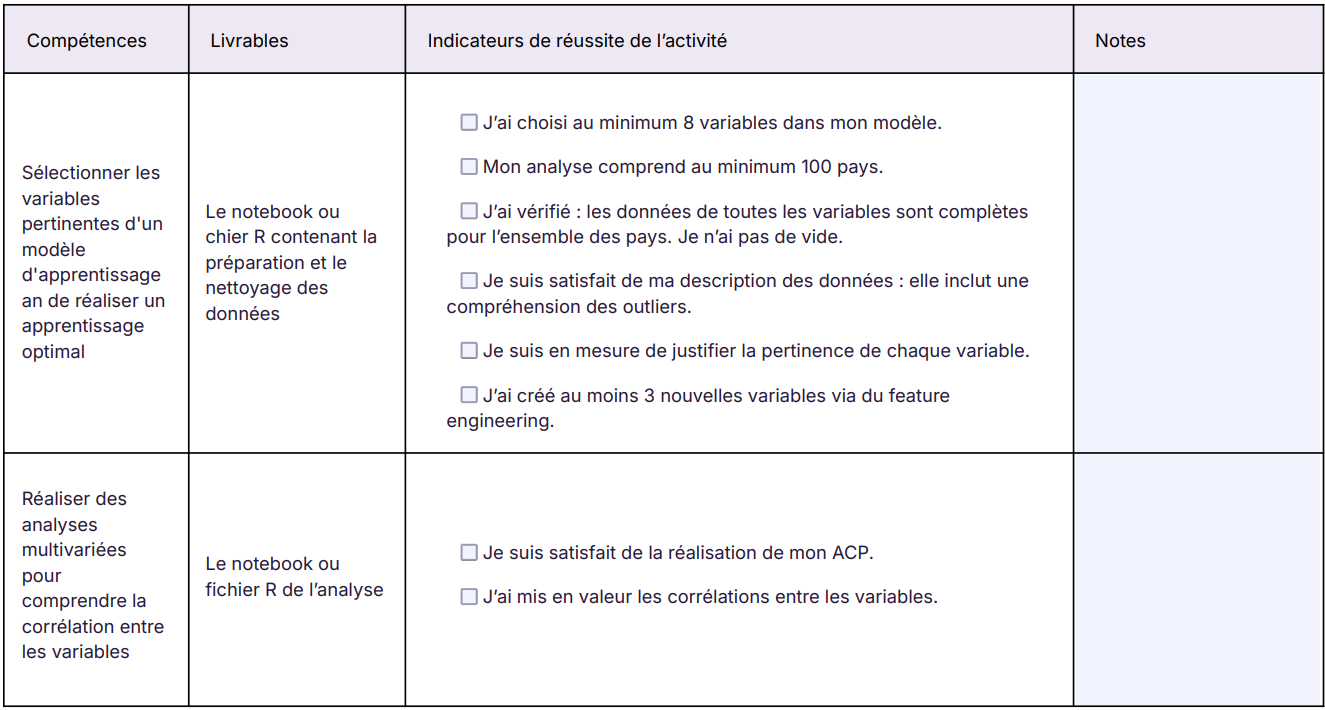

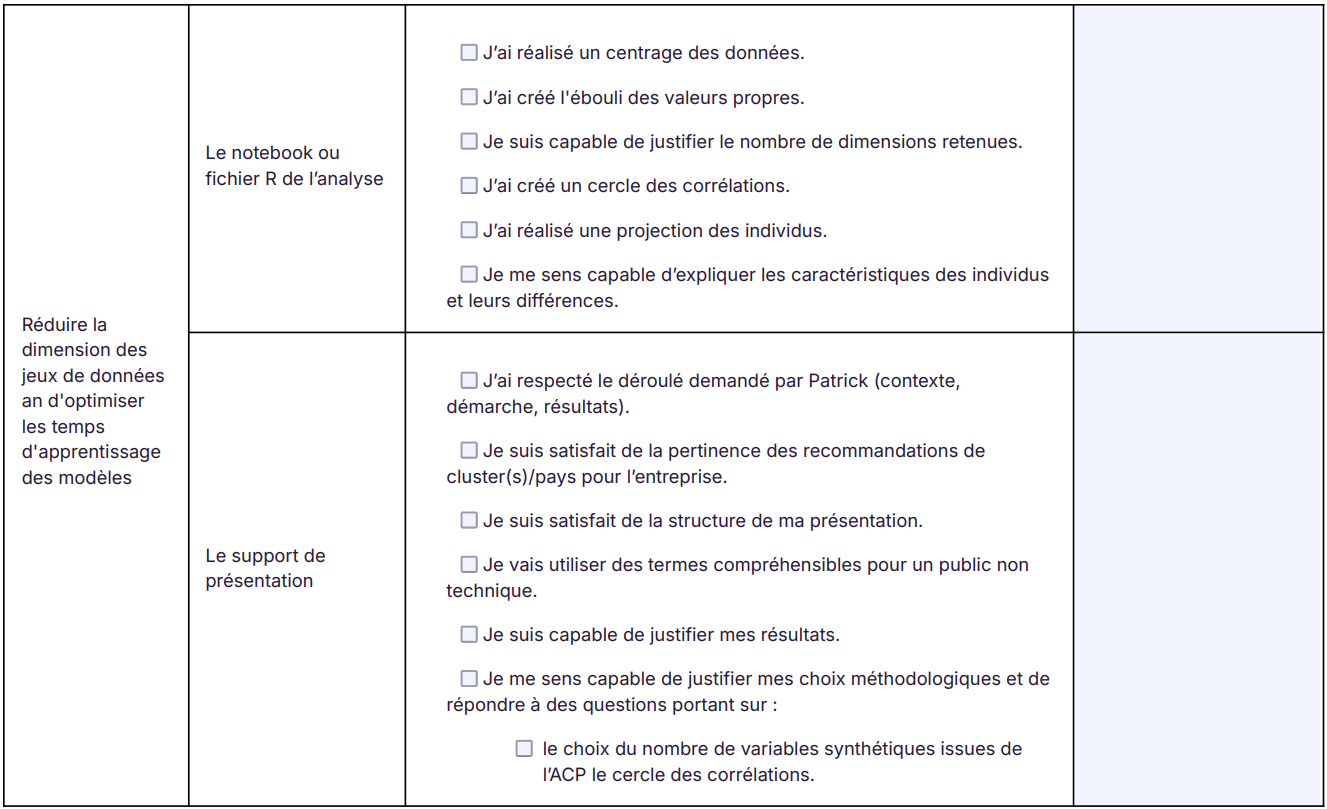

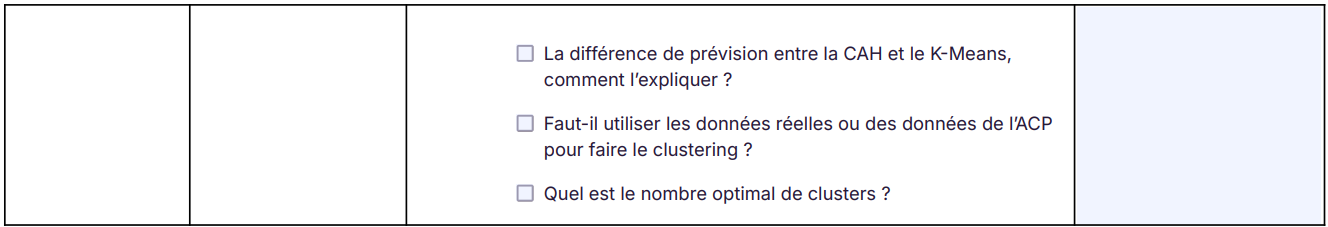

#**Sommaire**


#Phase 1 - Exploration et fusion des données


*   Étape 1 - Importation des librairies et chargement des fichiers
*   Étape 2 - Nettoyage et analyse exploratoire des fichiers
*   Étape 3 - Jonction des fichiers
*   Étape 4 - Préparation du dataframe pour analyses


#Phase 2 - Analyses des données
*   Étape 1 - Importation des librairies et chargement du fichier
*   Étape 2 - analyse exploratoire des données
*   Étape 3 - ACP
*   Étape 4 - CAH
*   Étape 5 - K-means
*   Étape 6 - Recommandations

#Phase 2

##**Etape 1** - Importation des librairies et chargement du fichier

###**1.1** - Importation des librairies

In [555]:
import pandas as pd

import numpy as np

import missingno as msno

import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.collections import LineCollection

import seaborn as sns

from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [556]:
# Instruction permettant d'afficher toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)

###**1.2** - Chargements du fichier

In [557]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [558]:
# Importation du fichier population_2000_2018.csv
df = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 11/df_final.csv", sep=",")

##**Etape 2** - Analyse exploratoire des données

In [559]:
df.head()

,Zone,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB ($/hab),Political Stability,Rule Of Law,Doing Business
0,Afghanistan,0.771432,0.798984,0.000000,1.53,0.54,525.469771,-2.79,-1.58,39.2
1,Afrique du Sud,29.240609,9.016001,1.105074,35.69,14.11,6618.335083,-0.28,-0.16,64.9
2,Albanie,4.507364,13.175372,0.000000,16.36,6.26,4531.032207,0.37,-0.41,64.0
3,Algérie,6.644247,0.048322,0.000000,6.38,1.97,4554.667540,-0.92,-0.93,45.8
4,Allemagne,18.316346,10.186501,7.815297,19.47,7.96,45526.599958,0.57,1.57,79.4


Suite à un premier essai de visualisation avec l'ACP il est décidé d'écarter Hong-Kong (Outlier sur F1 et F2), la Belgique et les Pays-Bas (Outliers sur F3 et F4).

In [560]:
#df = df[df["Zone"] != "Hong Kong (Chine)"]
df = df[~df["Zone"].isin(["Hong Kong (Chine)", "Belgique", "Pays-Bas"])]

changement de l'index par les pays

In [561]:
df.set_index('Zone', inplace=True)
display(df)

,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB ($/hab),Political Stability,Rule Of Law,Doing Business
Zone,,,,,,,,,
Afghanistan,0.771432,0.798984,0.000000,1.53,0.54,525.469771,-2.79,-1.58,39.2
Afrique du Sud,29.240609,9.016001,1.105074,35.69,14.11,6618.335083,-0.28,-0.16,64.9
Albanie,4.507364,13.175372,0.000000,16.36,6.26,4531.032207,0.37,-0.41,64.0
Algérie,6.644247,0.048322,0.000000,6.38,1.97,4554.667540,-0.92,-0.93,45.8
Allemagne,18.316346,10.186501,7.815297,19.47,7.96,45526.599958,0.57,1.57,79.4
...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,5.059447,45.640427,9.908084,43.47,14.80,42340.591715,0.60,0.77,77.4
Équateur,20.255745,0.000000,0.000000,19.31,6.15,6233.322448,-0.08,-0.72,57.4
États-Unis,67.410113,0.378363,11.357038,55.68,19.93,60322.261424,0.26,1.61,83.7


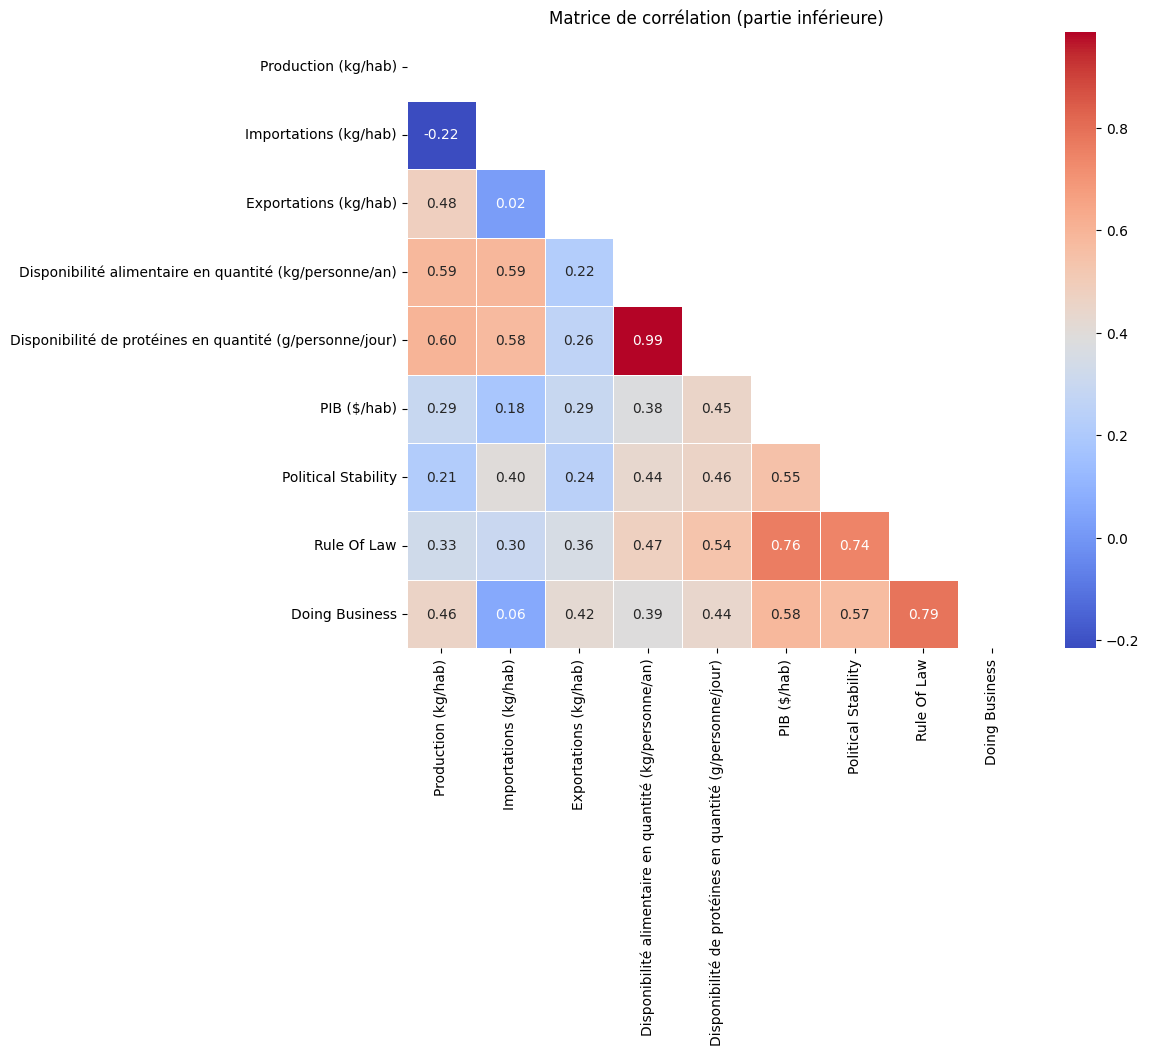

In [562]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Masque pour ne garder que la partie inférieure
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Affichage de la heatmap avec masque
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation (partie inférieure)")
plt.show()

Etant donné la forte corrélation entre **disponibilité ailmentaire en quantité** et **disponibilité de protéines**, nous alons écarter cette dernière variable pour la suite de l'analyse.

In [563]:
df.drop(columns=["Disponibilité de protéines en quantité (g/personne/jour)"], inplace=True)

Nous allons ensuite séparer les données. D'un coté `X` la matrice des données :

In [564]:
df.head(5)

,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business
Zone,,,,,,,,
Afghanistan,0.771432,0.798984,0.000000,1.53,525.469771,-2.79,-1.58,39.2
Afrique du Sud,29.240609,9.016001,1.105074,35.69,6618.335083,-0.28,-0.16,64.9
Albanie,4.507364,13.175372,0.000000,16.36,4531.032207,0.37,-0.41,64.0
Algérie,6.644247,0.048322,0.000000,6.38,4554.667540,-0.92,-0.93,45.8
Allemagne,18.316346,10.186501,7.815297,19.47,45526.599958,0.57,1.57,79.4


In [565]:
X = df.values
X[:5]

array([[ 7.71432467e-01,  7.98983627e-01,  0.00000000e+00,
         1.53000000e+00,  5.25469771e+02, -2.79000000e+00,
        -1.58000000e+00,  3.92000000e+01],
       [ 2.92406093e+01,  9.01600070e+00,  1.10507402e+00,
         3.56900000e+01,  6.61833508e+03, -2.80000000e-01,
        -1.60000000e-01,  6.49000000e+01],
       [ 4.50736417e+00,  1.31753722e+01,  0.00000000e+00,
         1.63600000e+01,  4.53103221e+03,  3.70000000e-01,
        -4.10000000e-01,  6.40000000e+01],
       [ 6.64424712e+00,  4.83217973e-02,  0.00000000e+00,
         6.38000000e+00,  4.55466754e+03, -9.20000000e-01,
        -9.30000000e-01,  4.58000000e+01],
       [ 1.83163458e+01,  1.01865014e+01,  7.81529681e+00,
         1.94700000e+01,  4.55266000e+04,  5.70000000e-01,
         1.57000000e+00,  7.94000000e+01]])

La forme de cette matrice est conforme à nos attentes :

In [566]:
X.shape

(167, 8)

Nous enregistrons les noms des pays dans une variable `country`

In [567]:
country = df.index
country

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie Saoudite', 'Argentine',
       'Arménie',
       ...
       'Viêt Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=167)

et les colonnes dans une variable `features` :

In [568]:
features = df.columns
features

Index(['Production (kg/hab)', 'Importations (kg/hab)', 'Exportations (kg/hab)',
       'Disponibilité alimentaire en quantité (kg/personne/an)', 'PIB ($/hab)',
       'Political Stability', 'Rule Of Law', 'Doing Business'],
      dtype='object')

##**Etape 3** - ACP

###**3.1** - Scaling

Commençons par scaler les données. On instancie :

In [569]:
scaler = StandardScaler()

On fit et transforme en une seule étape :

In [570]:
X_scaled = scaler.fit_transform(X)

On attend une moyenne à 0 et un écart type à 1 :

In [571]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


###**3.2** - ACP

Nous allons travailler sur les 8 composantes :

In [572]:
n_components = 8

On instancie l'ACP :

In [573]:
pca = PCA(n_components=n_components)

On l'entraine sur les données scalées :

In [574]:
pca.fit(X_scaled)

PCA(n_components=8)

###**3.3** - Variance & éboulis des valeurs propres

Intéressons nous maintenant à la variance *captée* par chaque nouvelle composante :

In [575]:
pca.explained_variance_ratio_

array([0.48845592, 0.18277079, 0.13105803, 0.08291993, 0.05399348,
       0.04187037, 0.01491983, 0.00401165])

Ici la 1ère composante *capte* 49% de la variance de nos données initiales, la 2ème 18% etc etc.

Enregistrons cela dans une variable :

In [576]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([48.85, 18.28, 13.11,  8.29,  5.4 ,  4.19,  1.49,  0.4 ])

Les 2 premières composantes *captent* donc`49+18 = 67%` de la variance, les 3 premières `49+18+13 = 80%` de la variance etc etc.

Nous allons donc appliquer la somme cumulée de ces valeurs :

In [577]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 49.,  67.,  80.,  89.,  94.,  98., 100., 100.])

Définisons ensuite une variable avec la liste de nos composantes :

In [578]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

On peut enfin l'afficher de façon graphique :

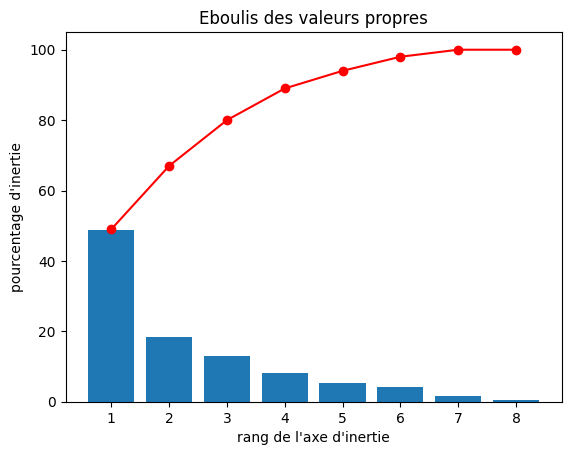

In [579]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que  80% de la variance est comprise dans les 3 premières composantes, et  90% dans les 4 premières.

###**3.4** - Composantes

Intéressons nous maintenant à nos fameuses composantes.

La formule de ce calcul nous est donnée par l'attribut `components_`. Cette variable est généralement nommée `pcs` :

In [580]:
pcs = pca.components_
pcs

array([[ 0.28655636,  0.18616695,  0.26337111,  0.35553994,  0.39080797,
         0.39327582,  0.45665832,  0.41415066],
       [-0.49962089,  0.68553276, -0.38886967,  0.19426417,  0.01110916,
         0.23097507,  0.06522773, -0.18367924],
       [ 0.46242199,  0.29787148,  0.16012568,  0.6110494 , -0.3259179 ,
        -0.22058718, -0.29312301, -0.24003041],
       [-0.3137225 ,  0.30602485,  0.84647068, -0.25346797, -0.140735  ,
         0.01354302, -0.04467379, -0.07199216],
       [-0.05760658,  0.07181187,  0.08423244,  0.07435198,  0.76673894,
        -0.5418173 , -0.00610215, -0.31210479],
       [-0.19655773,  0.17853898, -0.07308529,  0.07643857, -0.20150768,
        -0.63298138,  0.13679331,  0.67699439],
       [ 0.04759529, -0.07584003,  0.00404039, -0.00666848, -0.30241655,
        -0.21121119,  0.82473352, -0.41913108],
       [-0.55838137, -0.51983003,  0.15751289,  0.6219404 , -0.03416419,
         0.06558164, -0.01888488, -0.02328184]])

Affichons la même chose mais version `pandas` :

In [581]:
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8
Production (kg/hab),0.286556,-0.499621,0.462422,-0.313722,-0.057607,-0.196558,0.047595,-0.558381
Importations (kg/hab),0.186167,0.685533,0.297871,0.306025,0.071812,0.178539,-0.075840,-0.519830
Exportations (kg/hab),0.263371,-0.388870,0.160126,0.846471,0.084232,-0.073085,0.004040,0.157513
Disponibilité alimentaire en quantité (kg/personne/an),0.355540,0.194264,0.611049,-0.253468,0.074352,0.076439,-0.006668,0.621940
PIB ($/hab),0.390808,0.011109,-0.325918,-0.140735,0.766739,-0.201508,-0.302417,-0.034164
Political Stability,0.393276,0.230975,-0.220587,0.013543,-0.541817,-0.632981,-0.211211,0.065582
Rule Of Law,0.456658,0.065228,-0.293123,-0.044674,-0.006102,0.136793,0.824734,-0.018885
Doing Business,0.414151,-0.183679,-0.240030,-0.071992,-0.312105,0.676994,-0.419131,-0.023282


Et pour une représentation plus *visuelle*, comme cela :

<Axes: >

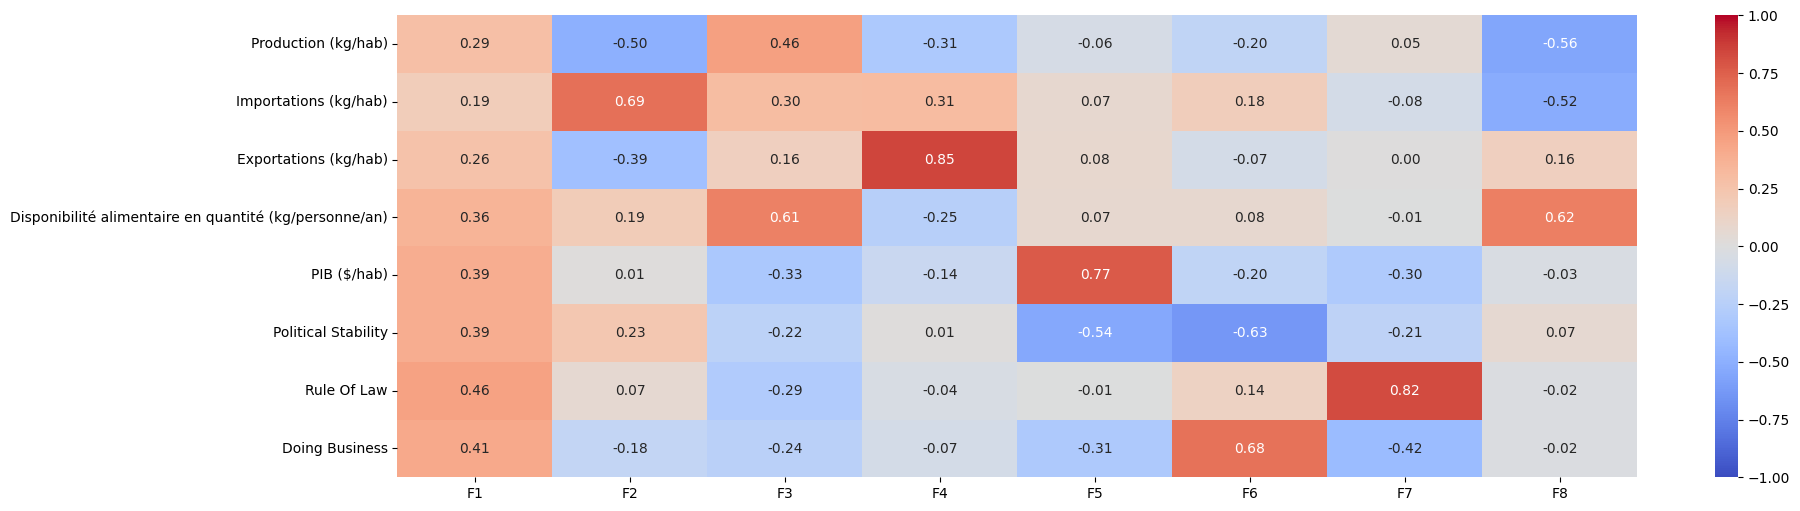

In [582]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

###**3.5** - Cercle des corrélations

Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes :

In [583]:
x, y = 0,1

Pour la partie graphique :

On peut en faire une fonction :

In [584]:
def correlation_graph(pca,
                      x_y,
                      features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Essayons cette fonction pour F1 et F2

In [585]:
x_y = (0,1)
x_y

(0, 1)

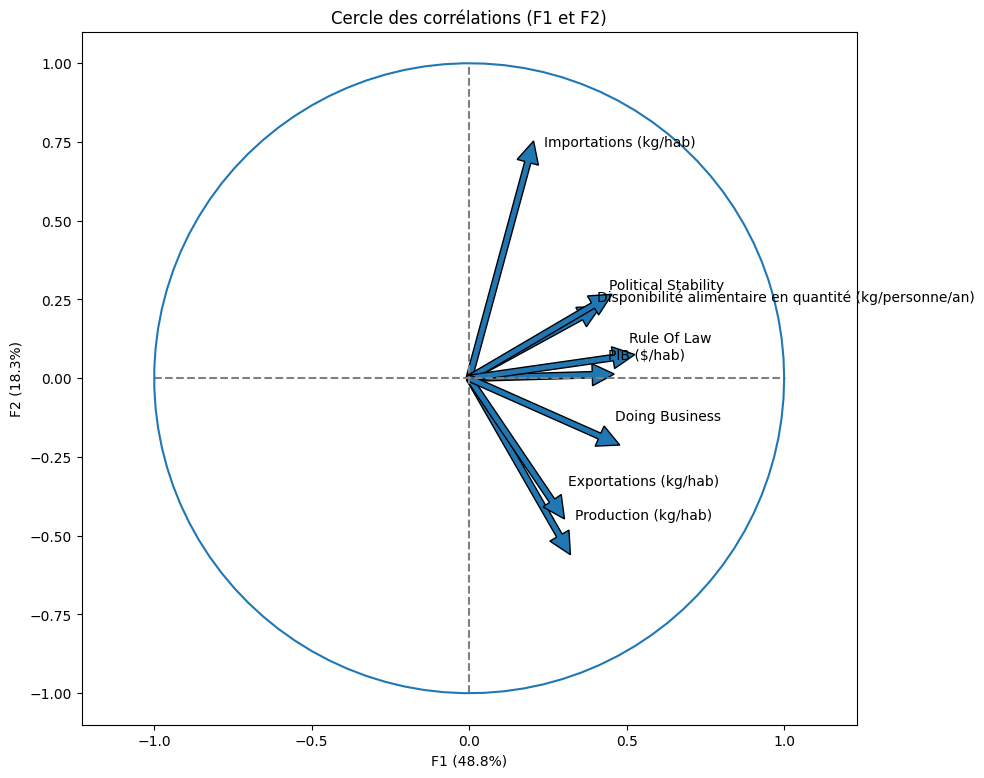

In [586]:
correlation_graph(pca, x_y, features)

**F1** semble représenter un indicateur d'**environnement institutionnel et économique**, avec des variables telles que *Disponibilité alimentaire*, *Political Stability*, *Rule of Law*, *PIB* et *Doing Business*, qui apparaissent positivement corrélées.

**F2**, quant à elle, semble refléter un indicateur de **dépendance à l'import**, avec *Importations* positivement corrélée puis *Exportations* et *Production* négativement corrélées.

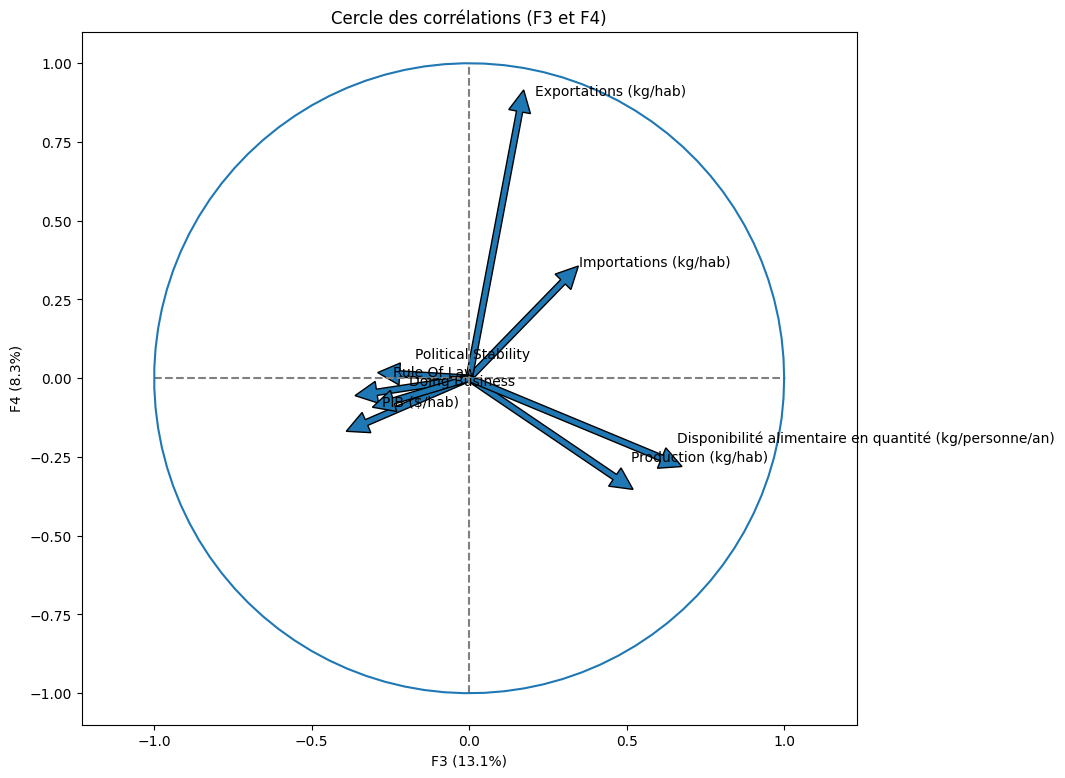

In [587]:
correlation_graph(pca, (2,3), features)

**F3** s'apparrente à un indicateur d'**indépendance alimentaire** avec des variables telles que *Disponibilité alimentaire* et *Production*

**F4** quant à elle serait un indicateur d'**échanges commerciaux** avec les variables *Exportations*, *Importations*

###**3.6** - Projection

Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [588]:
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj)
X_proj[:5]

,0,1,2,3,4,5,6,7
0,-3.830248,-0.501510,0.427814,0.291322,1.547947,0.699796,0.215077,-0.123381
1,0.330478,-0.271992,1.065929,-0.662003,-0.241200,0.296700,-0.009742,0.156562
2,-0.444619,0.645862,-0.351030,0.039448,-0.706664,0.028055,-0.406681,0.103565
3,-2.187754,-0.205392,-0.098311,0.020802,0.408139,-0.290371,0.091557,0.003210
4,2.646327,-0.465935,-1.321150,0.533116,0.542041,0.246076,0.218362,-0.013945


In [589]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set1")

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


Essayons la version avec F1 et F2 :

<ipython-input-589-13ca6971d78e>:60: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set1")


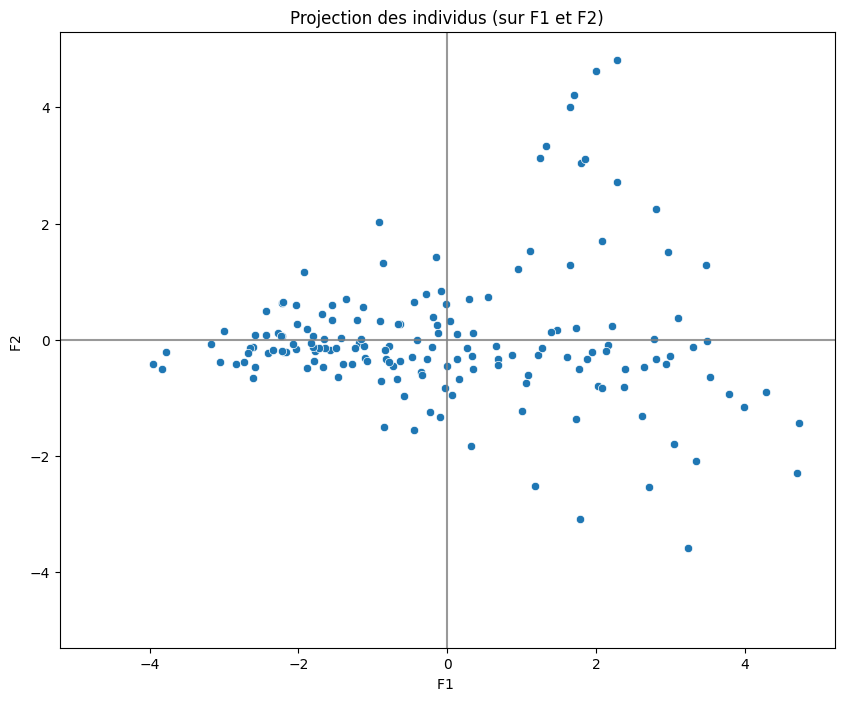

In [590]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y)

<ipython-input-589-13ca6971d78e>:60: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set1")


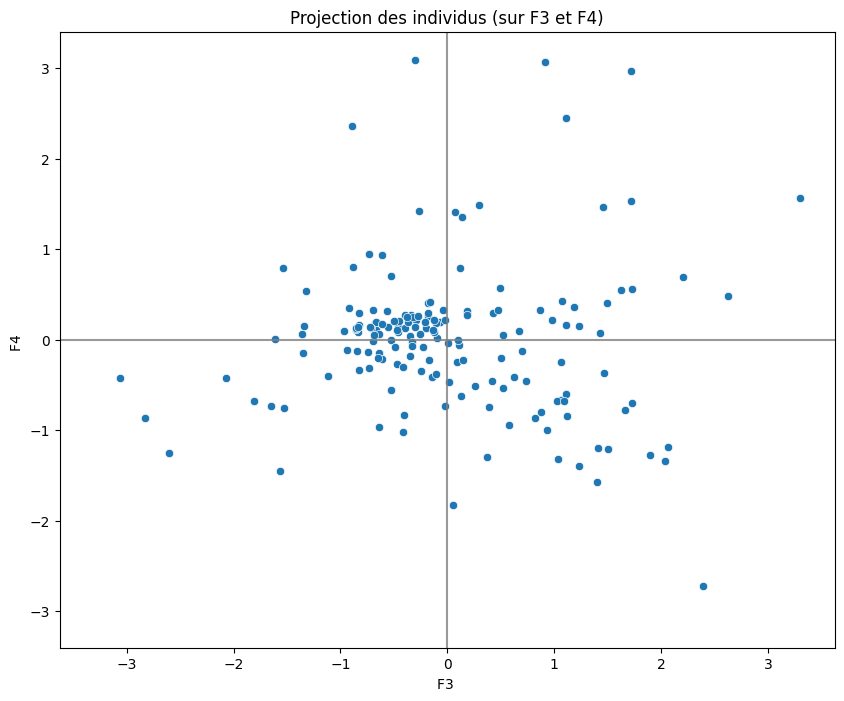

In [591]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y)

<ipython-input-589-13ca6971d78e>:60: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set1")


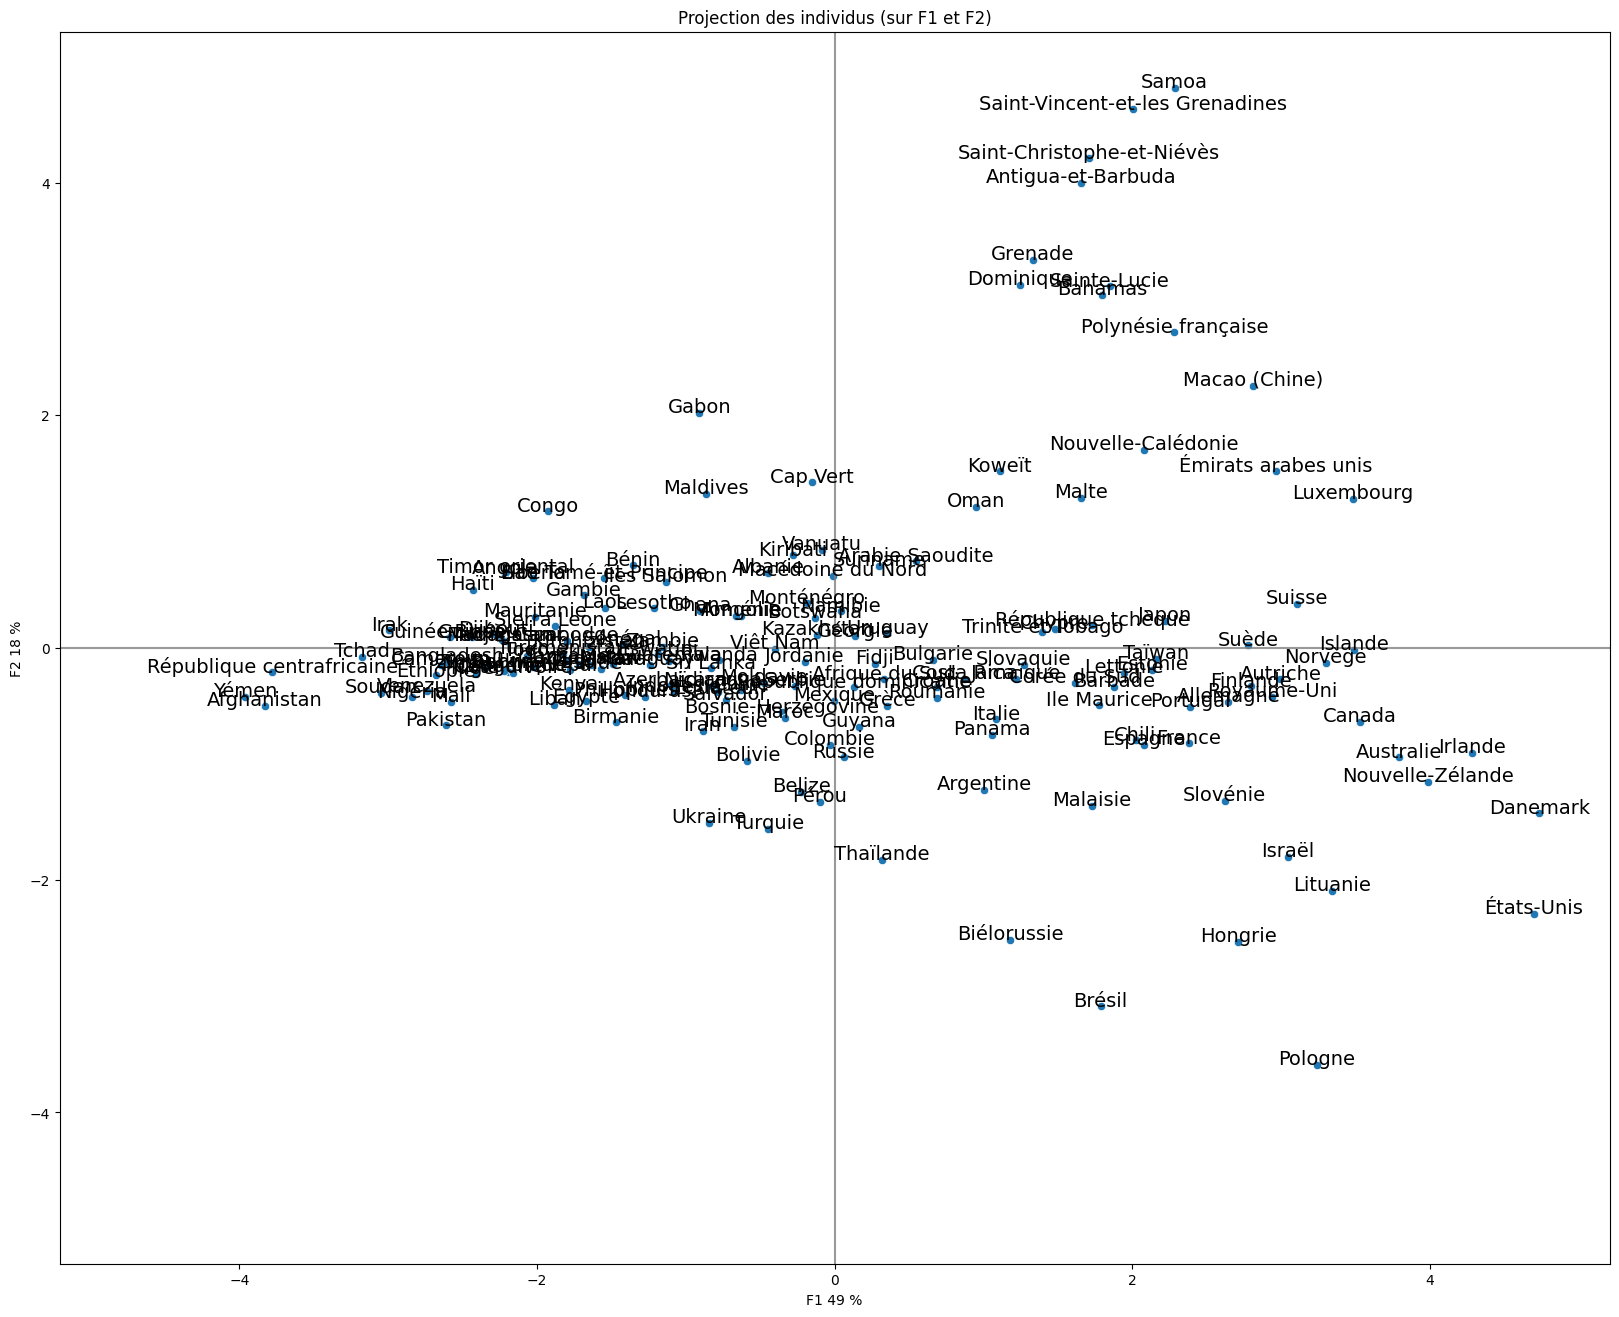

In [592]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=country, figsize=(20,16), marker="o")

<ipython-input-589-13ca6971d78e>:60: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set1")


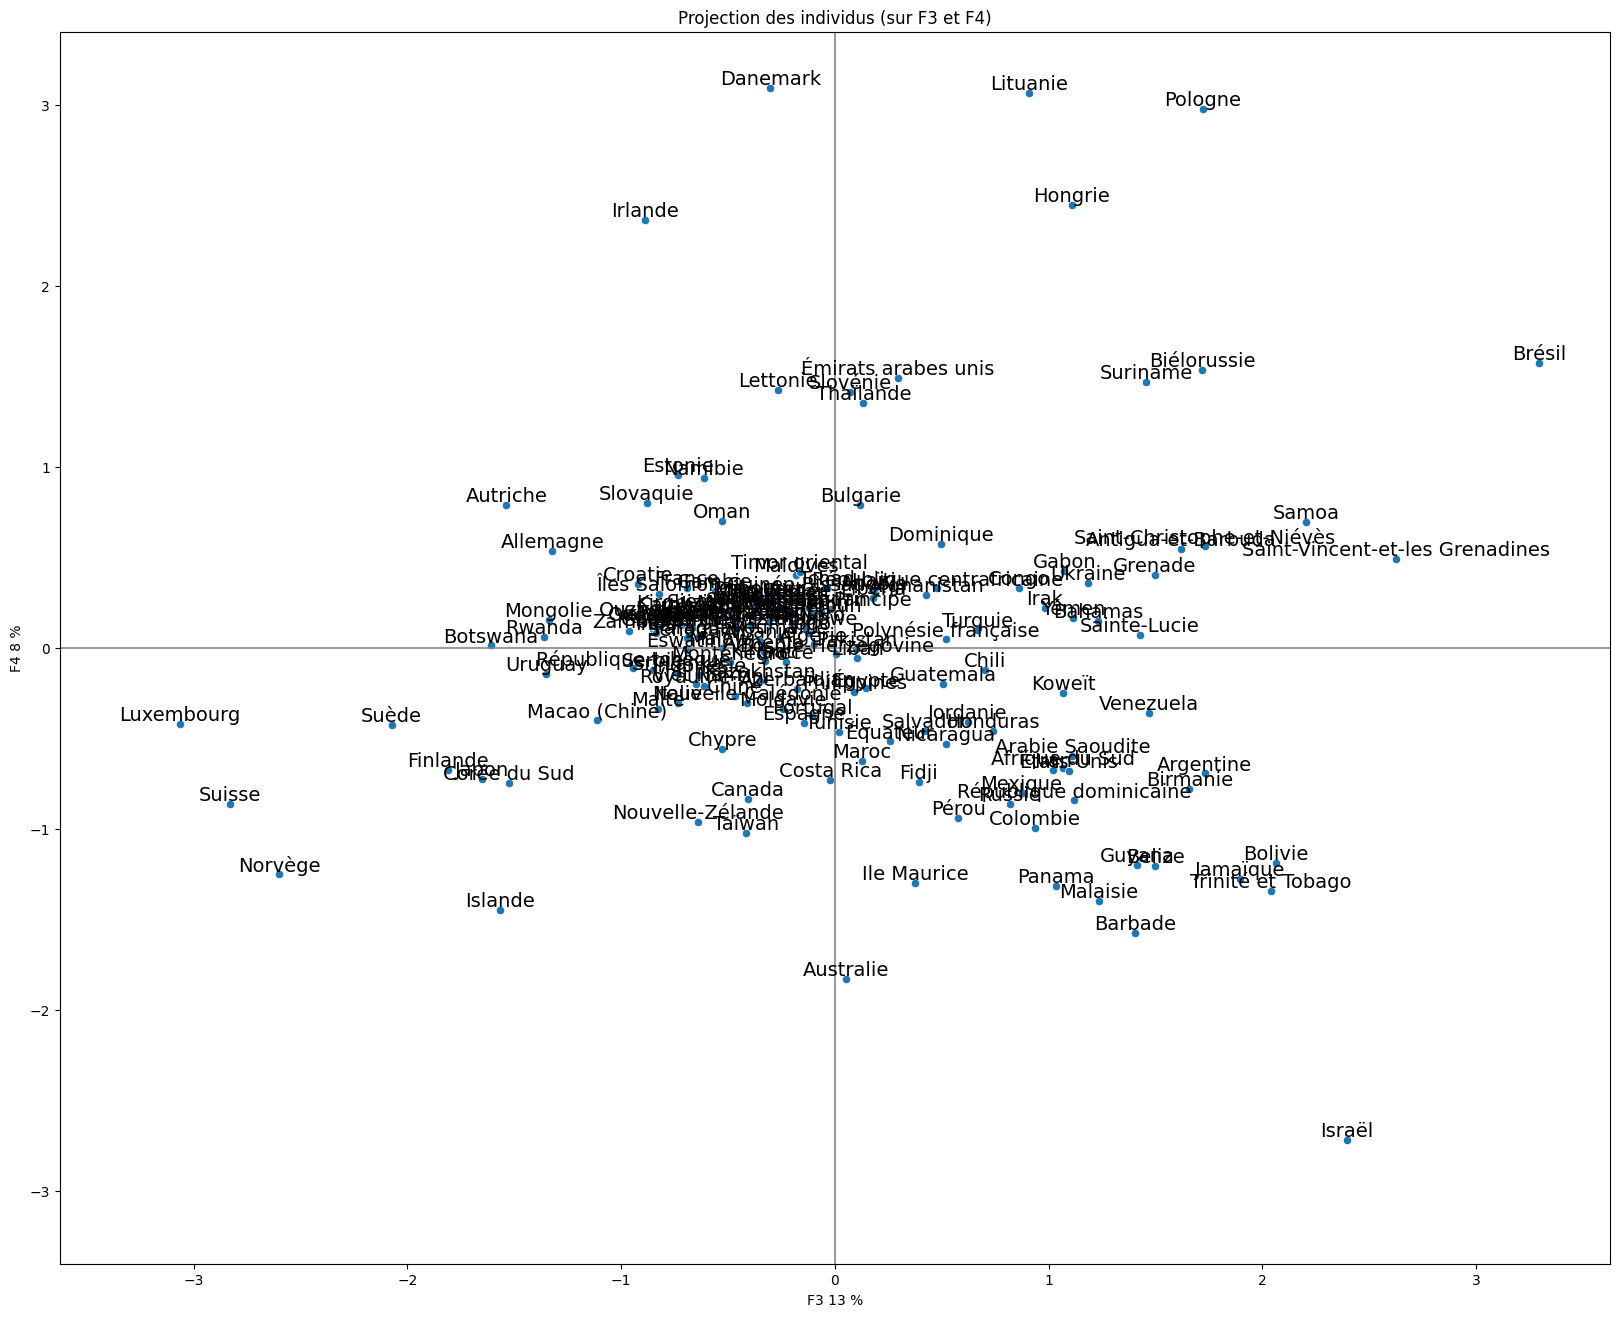

In [593]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, labels=country, figsize=(20,16), marker="o")

##**Etape 4** - CAH

###**4.1** - Linkage

Nous allons calculer les distances en spécifiant la méthode à utiliser :

In [594]:
Z = linkage(X_scaled, method="ward")
Z[:10]

array([[ 38.        , 102.        ,   0.2802228 ,   2.        ],
       [109.        , 127.        ,   0.30225051,   2.        ],
       [  5.        ,  82.        ,   0.33296595,   2.        ],
       [ 90.        , 103.        ,   0.36641299,   2.        ],
       [ 76.        , 110.        ,   0.36923657,   2.        ],
       [  3.        , 148.        ,   0.37107102,   2.        ],
       [101.        , 163.        ,   0.37558886,   2.        ],
       [ 40.        ,  56.        ,   0.38157881,   2.        ],
       [ 88.        , 142.        ,   0.41326246,   2.        ],
       [107.        , 168.        ,   0.4202773 ,   3.        ]])

###**4.2** - Dendrogramme

Nous pouvons désormais afficher le dendrogramme :

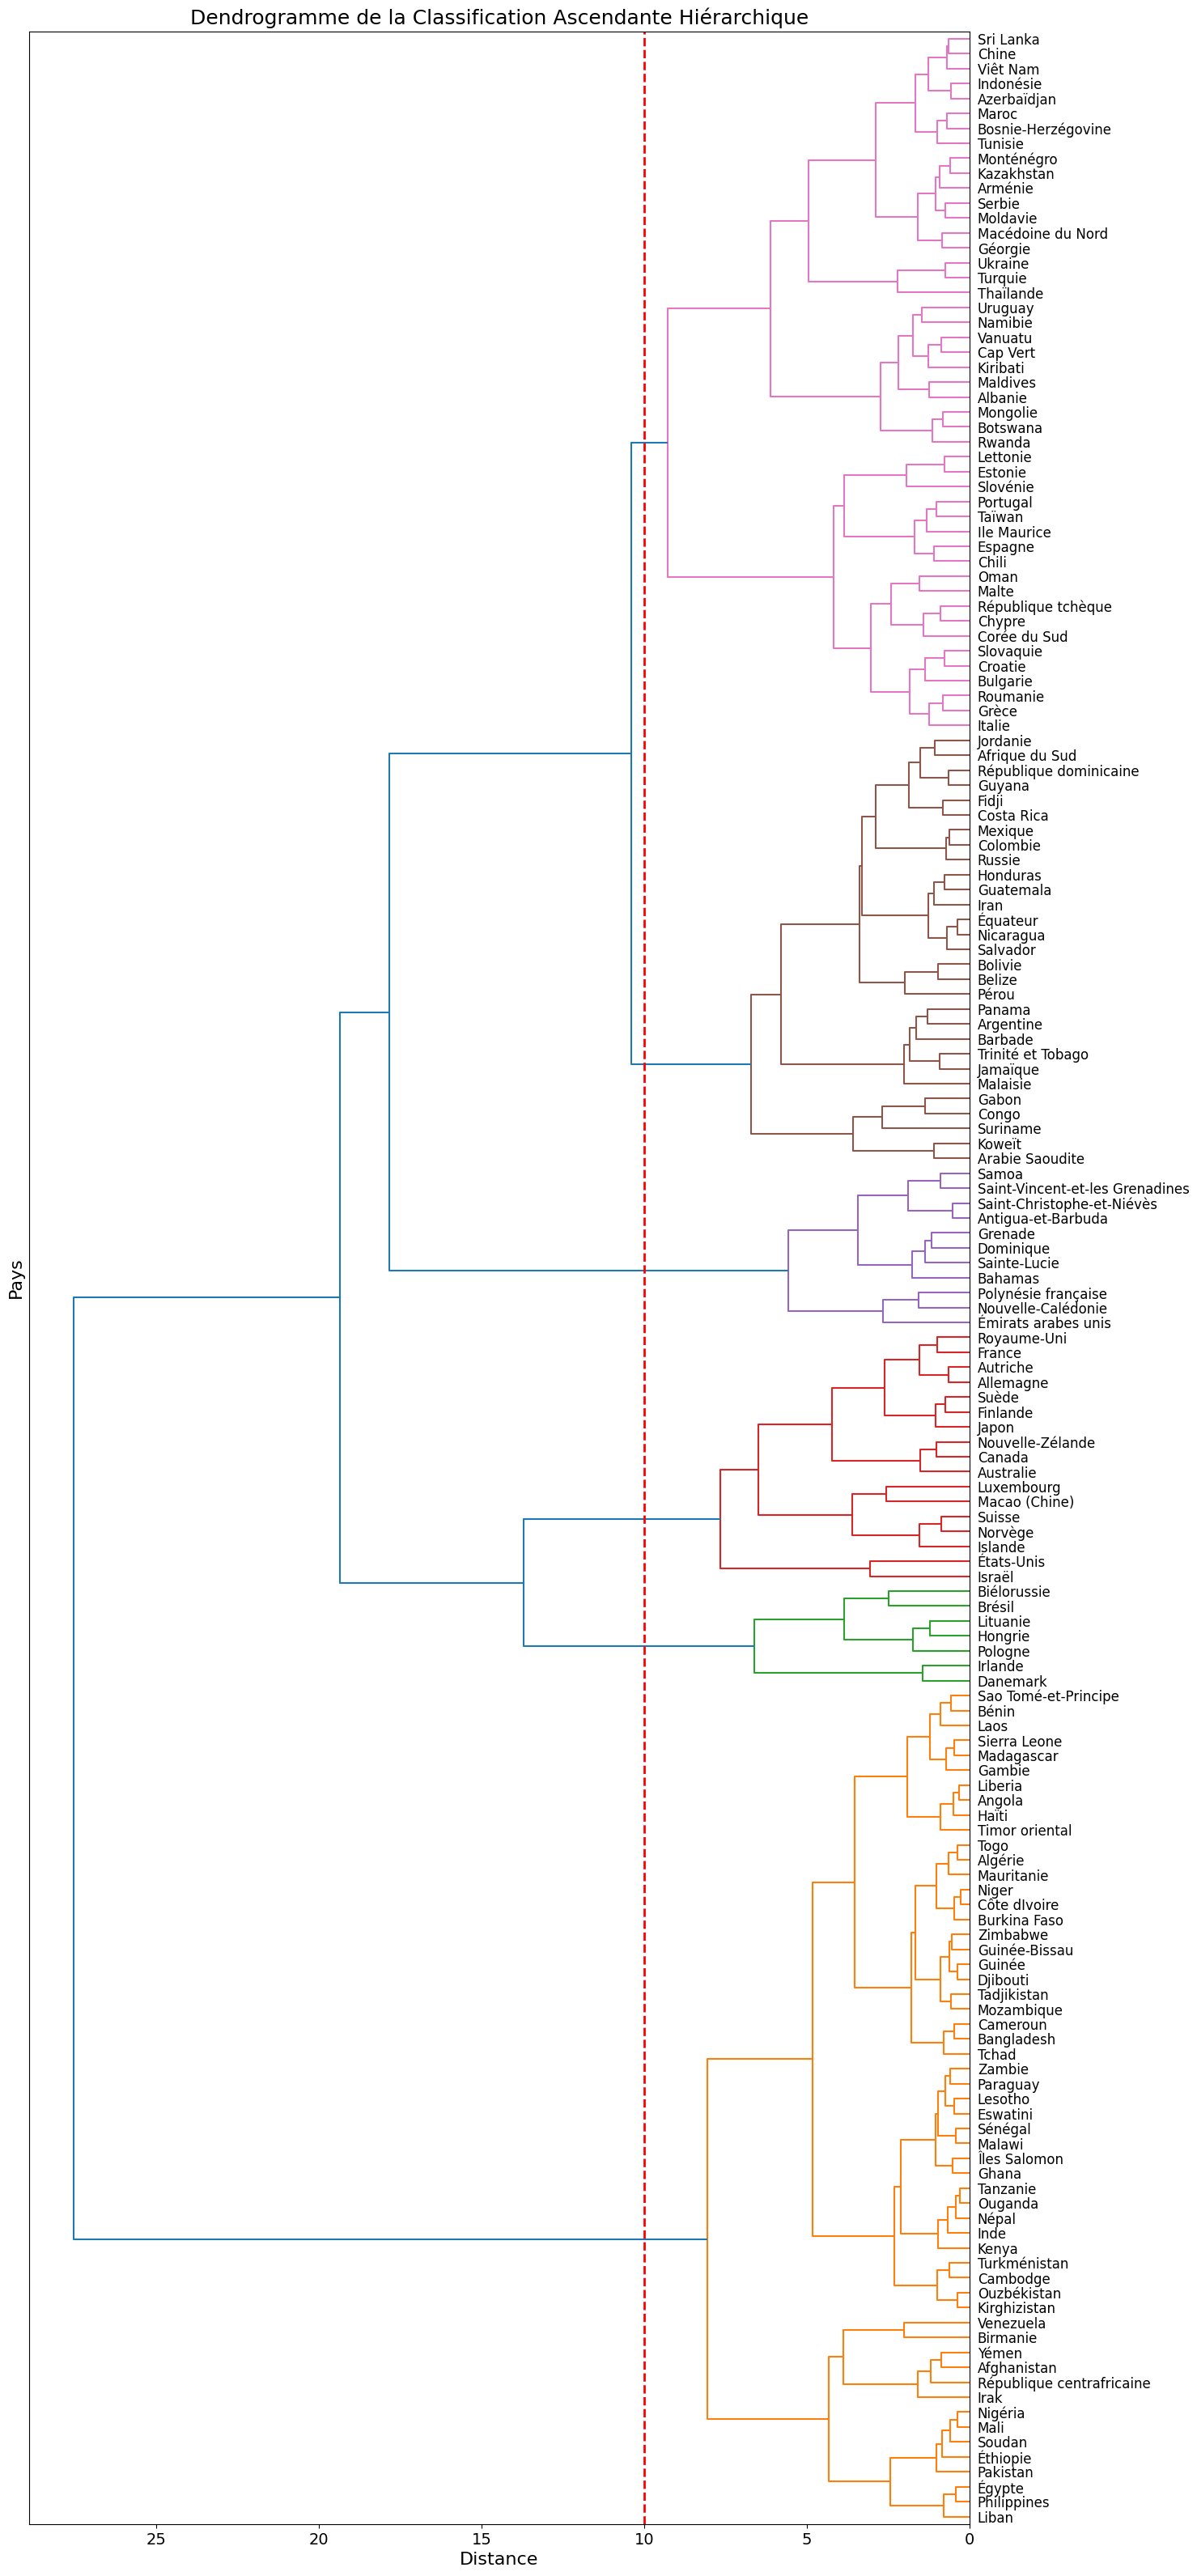

In [595]:
fig, ax = plt.subplots(1, 1, figsize=(15, 40))

# Tracer le dendrogramme avec une couleur de seuil
threshold = 10
_ = dendrogram(Z, ax=ax, labels=country, color_threshold=threshold, orientation="left")

# Ajouter une ligne pour visualiser le seuil de coupe
ax.axvline(x=threshold, color='red', linestyle='--', linewidth=2)

# Personnalisation du style
plt.title("Dendrogramme de la Classification Ascendante Hiérarchique", fontsize=18)
ax.set_xlabel("Distance", fontsize=16)
ax.set_ylabel("Pays", fontsize=16)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=12)

plt.show()

Le découpage en 6 clusters est pertinent car il assure une bonne répartition des pays.

###**4.3** - Clusters

Ensuite, on défini le nombre de clusters que l'on souhaite:

In [596]:
k = 6

On applique ensuite la fonction `fclusters`de `scipy`pour définir les clusters :

In [597]:
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 5, 6, 1, 3, 1, 4, 5, 5, 6, 3, 3, 6, 4, 1, 5, 5, 5, 6, 6, 2, 6,
       1, 2, 1, 6, 1, 1, 3, 6, 3, 6, 6, 6, 5, 5, 5, 6, 1, 2, 1, 4, 5, 6,
       6, 1, 5, 3, 3, 5, 5, 1, 1, 4, 6, 5, 1, 1, 5, 6, 1, 5, 2, 1, 6, 5,
       1, 2, 3, 3, 6, 5, 3, 5, 6, 1, 1, 6, 5, 1, 6, 1, 1, 2, 3, 6, 1, 5,
       1, 6, 1, 6, 6, 6, 1, 5, 6, 6, 1, 1, 6, 5, 1, 1, 3, 4, 3, 1, 6, 1,
       1, 1, 5, 1, 1, 2, 4, 6, 5, 6, 3, 6, 1, 6, 6, 5, 1, 1, 4, 4, 4, 4,
       1, 6, 1, 6, 6, 1, 6, 3, 5, 3, 1, 1, 1, 6, 6, 1, 1, 5, 6, 1, 6, 6,
       6, 6, 1, 6, 1, 1, 1, 1, 4, 5, 3, 1, 1], dtype=int32)

Nous créons ensuite un DataFrame pour interpréter les clusters :

In [598]:
df_cah = df.copy()

In [599]:
df_cah["cluster"] = clusters
df_cah.head(5)

,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business,cluster
Zone,,,,,,,,,
Afghanistan,0.771432,0.798984,0.000000,1.53,525.469771,-2.79,-1.58,39.2,1
Afrique du Sud,29.240609,9.016001,1.105074,35.69,6618.335083,-0.28,-0.16,64.9,5
Albanie,4.507364,13.175372,0.000000,16.36,4531.032207,0.37,-0.41,64.0,6
Algérie,6.644247,0.048322,0.000000,6.38,4554.667540,-0.92,-0.93,45.8,1
Allemagne,18.316346,10.186501,7.815297,19.47,45526.599958,0.57,1.57,79.4,3


###**4.4** - Interpretations des clusters

In [600]:
display(df_cah["cluster"].value_counts())

,count
cluster,
1,56
6,47
5,29
3,17
4,11
2,7


Nous obtenons 6 clusters de tailles variées. Le cluster 1 regroupe le plus grand nombre d'observations (56), tandis que le cluster 2 est le plus petit (7 observations).

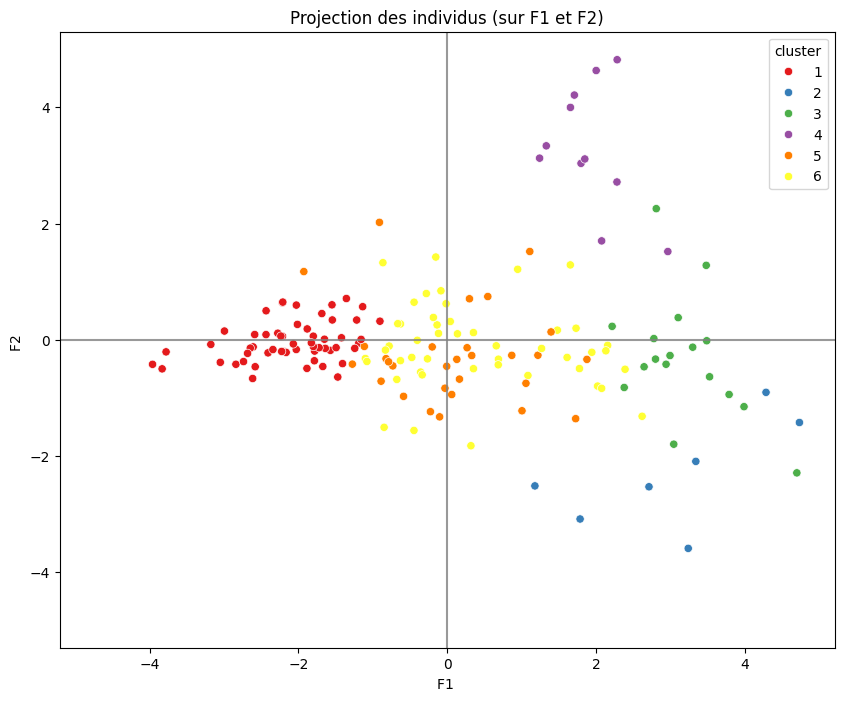

In [601]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df_cah['cluster'])

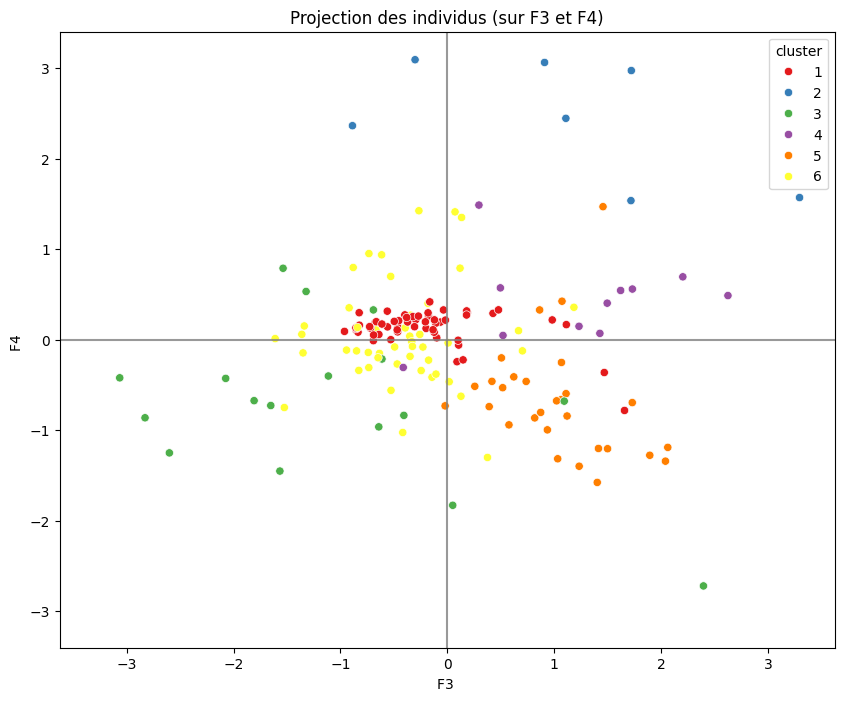

In [602]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, clusters=df_cah['cluster'])

In [603]:
summary_cah = df_cah.groupby("cluster").mean()
summary_cah


,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business
cluster,,,,,,,,
1,3.686722,2.545050,0.022857,5.770893,2001.698043,-0.818929,-0.854107,48.889286
2,46.389714,9.877140,21.815097,30.652857,27329.458793,0.482857,0.555714,74.285714
3,28.928501,8.001019,3.486125,29.907059,57160.515150,0.866471,1.625294,78.464706
4,3.868350,62.624067,0.900735,50.661818,18840.345224,0.785455,0.698182,63.118182
5,30.469960,8.190009,0.766886,32.170000,8979.662317,-0.129310,-0.389310,59.803448
6,14.525028,8.131635,2.465707,17.627660,11614.572486,0.191277,0.245106,69.402128


Cluster 1 : Pays avec une très faible production et importations alimentaires, une disponibilité alimentaire très faible, et un PIB très bas. Les indicateurs de gouvernance sont également faibles.

Cluster 2 : Pays avec une production alimentaire élevée, des exportations importantes, une bonne disponibilité alimentaire, et un PIB relativement élevé. La stabilité politique et la qualité de la gouvernance sont modérées à bonnes.

**Cluster 3 : Pays avec une production alimentaire modérée, des exportations faibles, une bonne disponibilité alimentaire et un PIB très élevé. La stabilité politique et la gouvernance sont excellentes.**

Cluster 4 : Pays avec une faible production mais une forte dépendance aux importations, une bonne disponibilité alimentaire, et un PIB moyen. La stabilité politique et la gouvernance sont également solides.

Cluster 5 : Pays avec une production alimentaire élevée mais une faible exportation, une bonne disponibilité alimentaire, et un PIB moyen. Les indicateurs de gouvernance sont faibles à modérés.

Cluster 6 : Pays avec une production alimentaire modérée, des exportations faibles, une disponibilité alimentaire modérée, et un PIB moyen. Les indicateurs de gouvernance sont modérés.

In [604]:
df_cah.query("cluster == 3")

,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business,cluster
Zone,,,,,,,,,
Allemagne,18.316346,10.186501,7.815297,19.47,45526.599958,0.57,1.57,79.4,3
Australie,51.617637,0.650813,1.708385,47.65,53901.714539,0.88,1.65,80.2,3
Autriche,16.780234,12.471795,8.843637,18.20,47163.742578,1.03,1.80,78.5,3
Canada,38.576618,4.954795,4.437536,39.02,45129.628117,1.09,1.76,80.0,3
Macao (Chine),4.818619,36.942747,0.000000,34.47,77704.921531,1.41,0.81,63.8,3
Finlande,23.406154,2.903089,2.177317,18.76,46085.017474,1.06,2.02,79.9,3
France,26.988468,7.803523,7.726413,22.90,38687.162641,0.27,1.40,76.2,3
Islande,29.904932,5.980986,0.000000,29.95,72010.149032,1.34,1.57,78.9,3
Israël,76.299320,0.000000,0.363908,67.39,40997.911024,-0.89,0.99,75.4,3


Que ce soit dans les projections ou dans le tableau des moyennes des valeurs, le **cluster 3** apparaît comme étant le plus pertinent pour être notre cible.

##**Etape 5** - K-means

###**5.1** - Interties

In [605]:
# Une liste vide pour enregistrer les inerties :
inertia_list = [ ]

# Notre liste de nombres de clusters :
k_list = range(1, 10)

# Pour chaque nombre de clusters :
for k in k_list :

    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50, init='k-means++', max_iter=500, tol=1e-6)


    # On entraine
    kmeans.fit(X_scaled)

    # On enregistre l'inertie obtenue :
    inertia_list.append(kmeans.inertia_)

###**5.2** - Méthode du coude

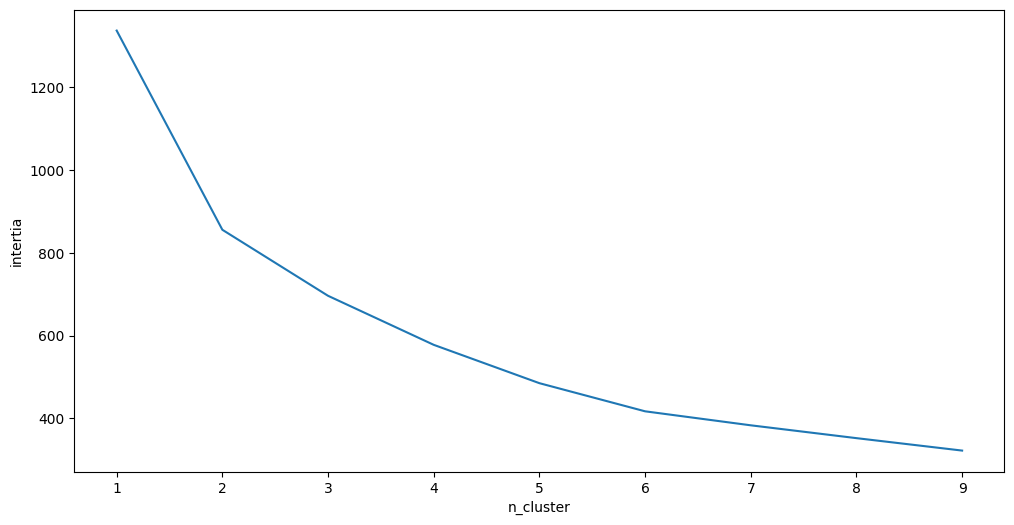

In [606]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, inertia_list)

En utilisant la méthode du coude, le graphique suggère que **6 clusters** seraient les plus adaptés à la situation.

###**5.3** - Clusters

Regardons maintenant les clusters que nous avons obtenus.

Nous devons d'abord ré-entrainer un estimateur:

In [607]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_scaled)

KMeans(n_clusters=6)

Voici les clusters :

In [608]:
kmeans.labels_

array([1, 4, 4, 1, 3, 1, 0, 4, 2, 4, 2, 3, 4, 0, 1, 2, 4, 4, 4, 4, 5, 4,
       1, 5, 1, 4, 1, 1, 2, 2, 3, 2, 4, 2, 4, 1, 4, 4, 1, 5, 1, 0, 4, 2,
       2, 1, 4, 3, 2, 4, 1, 1, 4, 0, 4, 4, 1, 1, 4, 4, 1, 4, 5, 1, 4, 4,
       1, 5, 3, 2, 2, 2, 3, 4, 4, 1, 1, 4, 2, 1, 2, 1, 1, 5, 3, 4, 1, 2,
       1, 1, 1, 2, 4, 2, 1, 4, 4, 4, 1, 1, 4, 4, 1, 1, 3, 2, 2, 1, 4, 1,
       1, 1, 2, 1, 1, 5, 0, 2, 4, 4, 2, 4, 1, 2, 4, 4, 1, 1, 0, 0, 0, 0,
       1, 4, 1, 2, 5, 1, 4, 3, 4, 3, 1, 1, 1, 2, 4, 1, 1, 2, 4, 1, 4, 4,
       4, 4, 1, 4, 1, 4, 1, 1, 2, 4, 5, 1, 1], dtype=int32)

In [609]:
labels = kmeans.labels_

Nous créons ensuite un DataFrame pour interpréter les clusters :

In [610]:
df_kmeans = df.copy()

In [611]:
df_kmeans["cluster"] = labels
df_kmeans.head(5)

,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business,cluster
Zone,,,,,,,,,
Afghanistan,0.771432,0.798984,0.000000,1.53,525.469771,-2.79,-1.58,39.2,1
Afrique du Sud,29.240609,9.016001,1.105074,35.69,6618.335083,-0.28,-0.16,64.9,4
Albanie,4.507364,13.175372,0.000000,16.36,4531.032207,0.37,-0.41,64.0,4
Algérie,6.644247,0.048322,0.000000,6.38,4554.667540,-0.92,-0.93,45.8,1
Allemagne,18.316346,10.186501,7.815297,19.47,45526.599958,0.57,1.57,79.4,3


###**5.4** - Interpretations des clusters

In [612]:
display(df_kmeans["cluster"].value_counts())

,count
cluster,
1,57
4,54
2,28
3,10
0,9
5,9


Le cluster 1 regroupe le plus grand nombre d'observations (57), tandis que les clusters 0 et 5 en comptent le moins (9).

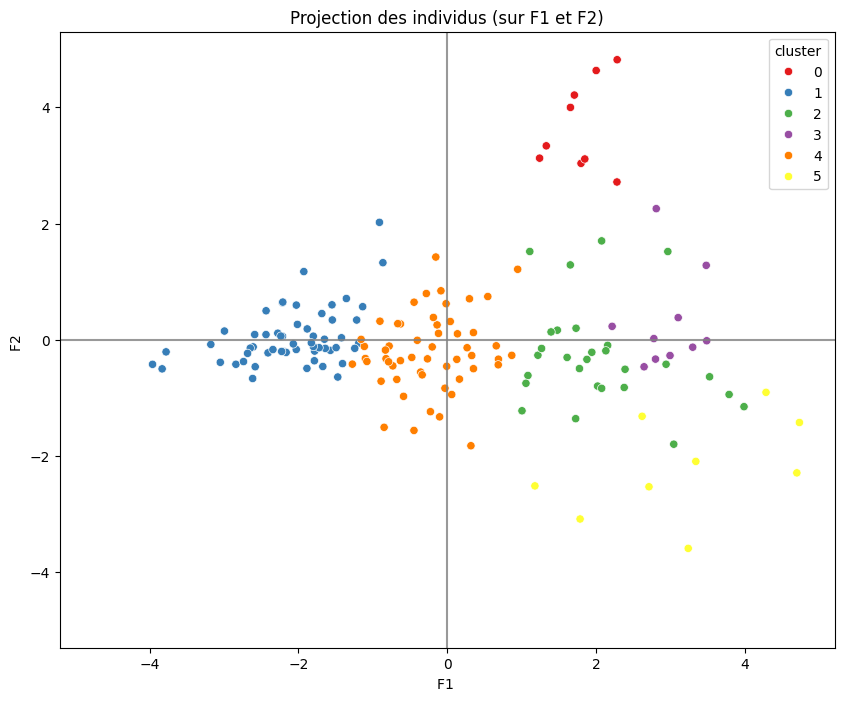

In [613]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df_kmeans['cluster'])

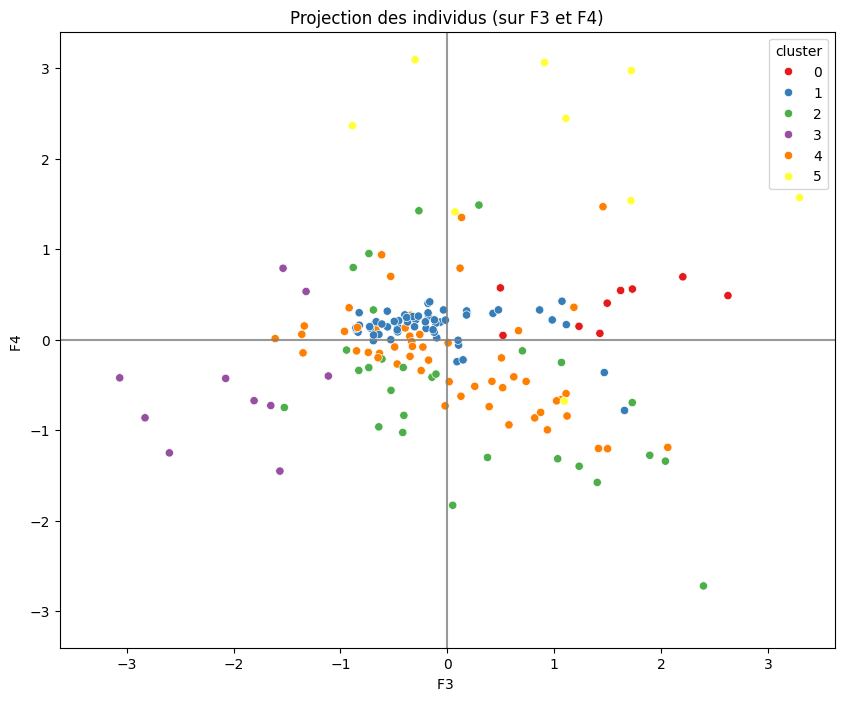

In [614]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, clusters=df_kmeans['cluster'])

In [615]:
summary_kmeans = df_kmeans.groupby("cluster").mean()
summary_kmeans


,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business
cluster,,,,,,,,
0,3.764917,67.861214,0.000000,52.788889,14727.610607,0.863333,0.612222,60.077778
1,3.592906,3.823791,0.021415,6.611754,2249.853509,-0.815789,-0.878070,48.305263
2,31.575968,10.889321,3.170952,34.788571,26605.534450,0.546786,0.862143,73.907143
3,15.628087,11.034279,2.339926,20.905000,64920.477136,1.118000,1.669000,76.830000
4,17.146750,6.169272,1.293518,19.168704,6644.213684,-0.113704,-0.207037,64.281481
5,47.423736,8.794492,19.781027,32.740000,30547.950076,0.501111,0.721111,75.466667


Cluster 0 : Pays à faible production alimentaire, dépendant fortement des importations, avec une disponibilité alimentaire élevée et un PIB relativement modéré. La stabilité politique et la qualité de la gouvernance sont bonnes.

Cluster 1 : Pays avec une faible production et importations, une faible disponibilité alimentaire, et un PIB faible. La stabilité politique et la gouvernance sont faibles.

Cluster 2 : Pays avec une production alimentaire élevée, des importations modérées et des exportations notables, offrant une bonne disponibilité alimentaire et un PIB élevé. La stabilité politique et la gouvernance sont également bonnes.

**Cluster 3 : Pays à production alimentaire modérée, un peu d'exportation, et PIB très élevé, avec des indicateurs de gouvernance (stabilité politique, état de droit, facilité à faire des affaires) parmi les meilleurs.**

Cluster 4 : Pays avec une production alimentaire modérée et des importations faibles, une disponibilité alimentaire modérée et un PIB relativement bas. Les indicateurs de gouvernance sont faibles.

Cluster 5 : Pays avec une très forte production alimentaire, des exportations importantes, une bonne disponibilité alimentaire, et un PIB élevé, avec une gouvernance assez bonne.

In [631]:
df_kmeans.query("cluster == 3")

,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business,cluster
Zone,,,,,,,,,
Allemagne,18.316346,10.186501,7.815297,19.47,45526.599958,0.57,1.57,79.4,3
Autriche,16.780234,12.471795,8.843637,18.20,47163.742578,1.03,1.80,78.5,3
Macao (Chine),4.818619,36.942747,0.000000,34.47,77704.921531,1.41,0.81,63.8,3
Finlande,23.406154,2.903089,2.177317,18.76,46085.017474,1.06,2.02,79.9,3
Islande,29.904932,5.980986,0.000000,29.95,72010.149032,1.34,1.57,78.9,3
Japon,17.372178,8.384135,0.078430,18.50,38834.052934,1.10,1.53,78.3,3
Luxembourg,0.000000,18.583906,1.689446,18.33,110193.213797,1.31,1.70,69.1,3
Norvège,19.069823,0.377620,0.000000,19.05,76131.838403,1.15,1.98,82.1,3
Suisse,10.761839,6.031360,0.473048,15.72,82254.376927,1.24,1.89,76.1,3


En utilisant K-means, le cluster 3 se distingue nettement comme étant le plus pertinent pour cibler efficacement notre marché.

###**5.5** - Centroid

In [616]:
# On peut stocker nos centroids dans une variable :
centroids = kmeans.cluster_centers_
centroids

array([[-0.71078184,  3.53530571, -0.43797809,  2.07078151,  0.05417046,
         1.06554954,  0.71646499, -0.11437108],
       [-0.72097502, -0.37180183, -0.43364257, -0.85884024, -0.6065547 ,
        -0.82499641, -0.89516894, -1.01663696],
       [ 0.93726992,  0.05928652,  0.20398136,  0.92878511,  0.68313309,
         0.70914451,  0.98673448,  0.94553538],
       [-0.00778364,  0.06813085,  0.03574008,  0.04796794,  2.71199502,
         1.35228201,  1.85928697,  1.1695482 ],
       [ 0.08221061, -0.22869727, -0.17610522, -0.06218812, -0.37386349,
        -0.03450902, -0.16949942,  0.20780804],
       [ 1.87639089, -0.06852502,  3.56669249,  0.79881733,  0.89189282,
         0.65771888,  0.83421975,  1.06505998]])

In [617]:
# On utilise bien le scaler déjà entrainé :
centroids_scaled = scaler.fit_transform(centroids)

# et on utilise l'ACP déjà entrainée :
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj,
                              columns = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8"],
                              index=["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5" ])

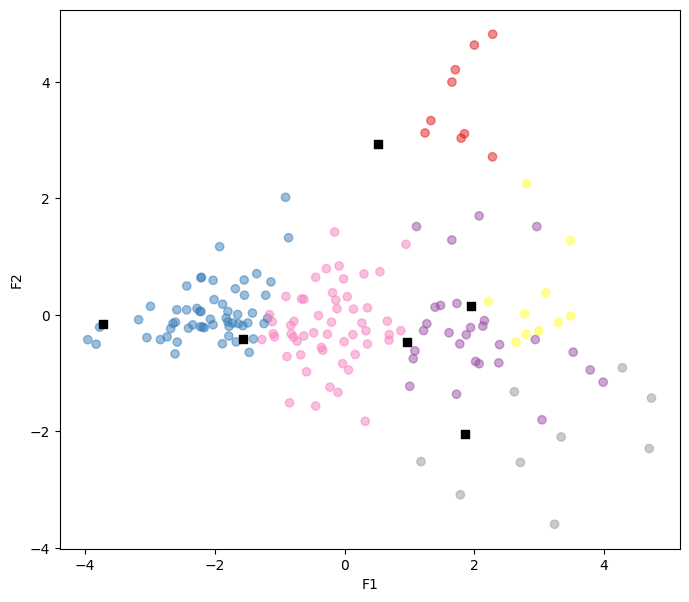

In [618]:
# On définit notre figure et son axe :
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) :
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") :
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

In [619]:
centroids

array([[-0.71078184,  3.53530571, -0.43797809,  2.07078151,  0.05417046,
         1.06554954,  0.71646499, -0.11437108],
       [-0.72097502, -0.37180183, -0.43364257, -0.85884024, -0.6065547 ,
        -0.82499641, -0.89516894, -1.01663696],
       [ 0.93726992,  0.05928652,  0.20398136,  0.92878511,  0.68313309,
         0.70914451,  0.98673448,  0.94553538],
       [-0.00778364,  0.06813085,  0.03574008,  0.04796794,  2.71199502,
         1.35228201,  1.85928697,  1.1695482 ],
       [ 0.08221061, -0.22869727, -0.17610522, -0.06218812, -0.37386349,
        -0.03450902, -0.16949942,  0.20780804],
       [ 1.87639089, -0.06852502,  3.56669249,  0.79881733,  0.89189282,
         0.65771888,  0.83421975,  1.06505998]])

In [620]:
# Créez un DataFrame pour les centroids dans l'espace original
centroids_df = pd.DataFrame(centroids, columns=features)

# Ajoutez l'index pour les clusters
centroids_df.index = [f"Cluster {i}" for i in range(len(centroids))]

# Affichez le DataFrame
centroids_df

,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business
Cluster 0,-0.710782,3.535306,-0.437978,2.070782,0.054170,1.065550,0.716465,-0.114371
Cluster 1,-0.720975,-0.371802,-0.433643,-0.858840,-0.606555,-0.824996,-0.895169,-1.016637
Cluster 2,0.937270,0.059287,0.203981,0.928785,0.683133,0.709145,0.986734,0.945535
Cluster 3,-0.007784,0.068131,0.035740,0.047968,2.711995,1.352282,1.859287,1.169548
Cluster 4,0.082211,-0.228697,-0.176105,-0.062188,-0.373863,-0.034509,-0.169499,0.207808
Cluster 5,1.876391,-0.068525,3.566692,0.798817,0.891893,0.657719,0.834220,1.065060


##**Etape 6** - Interprétations et recommandations

In [621]:
df_cah_clusters = df_cah.query("cluster ==3")
df_cah_clusters

,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business,cluster
Zone,,,,,,,,,
Allemagne,18.316346,10.186501,7.815297,19.47,45526.599958,0.57,1.57,79.4,3
Australie,51.617637,0.650813,1.708385,47.65,53901.714539,0.88,1.65,80.2,3
Autriche,16.780234,12.471795,8.843637,18.20,47163.742578,1.03,1.80,78.5,3
Canada,38.576618,4.954795,4.437536,39.02,45129.628117,1.09,1.76,80.0,3
Macao (Chine),4.818619,36.942747,0.000000,34.47,77704.921531,1.41,0.81,63.8,3
Finlande,23.406154,2.903089,2.177317,18.76,46085.017474,1.06,2.02,79.9,3
France,26.988468,7.803523,7.726413,22.90,38687.162641,0.27,1.40,76.2,3
Islande,29.904932,5.980986,0.000000,29.95,72010.149032,1.34,1.57,78.9,3
Israël,76.299320,0.000000,0.363908,67.39,40997.911024,-0.89,0.99,75.4,3


In [622]:
df_kmeans_clusters = df_kmeans.query("cluster == 3")
df_kmeans_clusters

,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business,cluster
Zone,,,,,,,,,
Allemagne,18.316346,10.186501,7.815297,19.47,45526.599958,0.57,1.57,79.4,3
Autriche,16.780234,12.471795,8.843637,18.20,47163.742578,1.03,1.80,78.5,3
Macao (Chine),4.818619,36.942747,0.000000,34.47,77704.921531,1.41,0.81,63.8,3
Finlande,23.406154,2.903089,2.177317,18.76,46085.017474,1.06,2.02,79.9,3
Islande,29.904932,5.980986,0.000000,29.95,72010.149032,1.34,1.57,78.9,3
Japon,17.372178,8.384135,0.078430,18.50,38834.052934,1.10,1.53,78.3,3
Luxembourg,0.000000,18.583906,1.689446,18.33,110193.213797,1.31,1.70,69.1,3
Norvège,19.069823,0.377620,0.000000,19.05,76131.838403,1.15,1.98,82.1,3
Suisse,10.761839,6.031360,0.473048,15.72,82254.376927,1.24,1.89,76.1,3


Nous obtenons ainsi une liste de pays présentant des conditions politico-économiques propices aux affaires, tout en faisant face à un déficit en disponibilité de volaille.

Nous excluons les pays hors de l'UE ainsi que la France afin de simplifier la gestion des opérations, la logistique, le transport, et de faciliter l'accès direct au marché cible :

In [628]:
pays_ue = [
    "Allemagne", "Autriche", "Belgique", "Bulgarie", "Chypre", "Croatie", "Danemark",
    "Espagne", "Estonie", "Finlande", "Grèce", "Hongrie", "Irlande",
    "Italie", "Lettonie", "Lituanie", "Luxembourg", "Malte", "Pays-Bas", "Pologne",
    "Portugal", "République tchèque", "Roumanie", "Slovaquie", "Slovénie", "Suède"
]


In [629]:
df_cah_ue = df_cah_clusters.loc[df_cah_clusters.index.isin(pays_ue)]
df_cah_ue

,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business,cluster
Zone,,,,,,,,,
Allemagne,18.316346,10.186501,7.815297,19.47,45526.599958,0.57,1.57,79.4,3
Autriche,16.780234,12.471795,8.843637,18.20,47163.742578,1.03,1.80,78.5,3
Finlande,23.406154,2.903089,2.177317,18.76,46085.017474,1.06,2.02,79.9,3
Luxembourg,0.000000,18.583906,1.689446,18.33,110193.213797,1.31,1.70,69.1,3
Suède,15.850747,8.480654,2.322084,16.60,53300.858728,0.97,1.82,82.2,3


In [630]:
df_kmeans_ue = df_kmeans_clusters.loc[df_kmeans_clusters.index.isin(pays_ue)]
df_kmeans_ue

,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),PIB ($/hab),Political Stability,Rule Of Law,Doing Business,cluster
Zone,,,,,,,,,
Allemagne,18.316346,10.186501,7.815297,19.47,45526.599958,0.57,1.57,79.4,3
Autriche,16.780234,12.471795,8.843637,18.20,47163.742578,1.03,1.80,78.5,3
Finlande,23.406154,2.903089,2.177317,18.76,46085.017474,1.06,2.02,79.9,3
Luxembourg,0.000000,18.583906,1.689446,18.33,110193.213797,1.31,1.70,69.1,3
Suède,15.850747,8.480654,2.322084,16.60,53300.858728,0.97,1.82,82.2,3


En conclusion, nous disposons d'une liste de **5 pays** qui représentent un **marché prometteur** pour l'exportation de notre volaille. Ces pays présentent des **caractéristiques politico-économiques favorables** et un **déficit en termes de disponibilité alimentaire**, ce qui crée une **opportunité** pour répondre à leurs besoins. De plus, le fait que la **France** figure dans le même **cluster** (CAH) d'origine que ces pays renforce notre confiance dans la **pertinence** de ce choix, indiquant un **positionnement stratégique favorable** à l'exportation.